In [1]:
import gc 
import numpy as np 
from joblib import Parallel, delayed
import matplotlib.pyplot as plt 

In [2]:
class Experiment: 
    def __init__(self, n = 2, num_trials = 10_000): 
        self.n = n 
        self.num_trials = num_trials

    def is_invertible(self, matrix: np.array): 
        return not np.allclose(0, np.linalg.det(matrix))
    
    def trial(self): 
        result = 0 
        matrix = np.random.randint(0, 2, size = (self.n, self.n))
        if self.is_invertible(matrix): 
            result = 1
        del matrix
        gc.collect() 
        return result 
    
    def run(self, n_jobs = -1):
        self.simulation_results = Parallel(n_jobs = n_jobs)(delayed(self.trial)() for _ in range(self.num_trials)) 
        self.percentage = sum(self.simulation_results) / self.num_trials

In [3]:
experiment_results = []
for n in range(1, 21): 
    e = Experiment(n = n, num_trials = 10_000)
    e.run()
    experiment_results.append((n, e.percentage))

In [4]:
x, y = zip(*experiment_results)

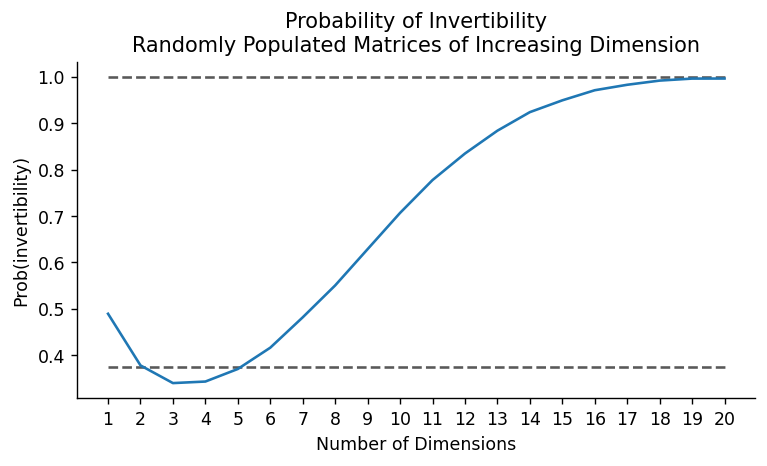

In [32]:
plt.figure(dpi = 125, figsize = (7, 3.5))
ax = plt.subplot(111)
ax.plot(x, 20*[1], "k--", alpha = 0.65)
ax.plot(x, 20*[0.375], "k--", alpha = 0.65)
ax.plot(x, y)
ax.spines[['right', 'top']].set_visible(False)
plt.xticks(np.arange(1, 21, 1.0))
plt.title("Probability of Invertibility\nRandomly Populated Matrices of Increasing Dimension")
plt.xlabel("Number of Dimensions")
plt.ylabel("Prob(invertibility)")

plt.show()